In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns


In [2]:
#Read csv file
df = pd.read_csv("http://rcs.bu.edu/examples/python/data_analysis/Salaries.csv")


There is a number of pandas commands to read other data formats:

```
pd.read_excel('myfile.xlsx',sheet_name='Sheet1', index_col=None, na_values=['NA'])
pd.read_stata('myfile.dta')
pd.read_sas('myfile.sas7bdat')
pd.read_hdf('myfile.h5','df')
```

In [4]:
#List first 5 records
df.head(10)


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [5]:
df.tail()

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


In [6]:
#Check a particular column type
df['salary'].dtype


dtype('int64')

In [7]:
#Check types for all the columns
df.dtypes


rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [8]:
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__

###  Selecting a column in a Data Frame

In [10]:
df['sex']

0       Male
1       Male
2       Male
3       Male
4       Male
5       Male
6       Male
7       Male
8       Male
9       Male
10      Male
11      Male
12      Male
13      Male
14      Male
15      Male
16      Male
17      Male
18      Male
19      Male
20      Male
21      Male
22      Male
23      Male
24      Male
25      Male
26      Male
27      Male
28      Male
29      Male
       ...  
48    Female
49    Female
50    Female
51    Female
52    Female
53    Female
54    Female
55    Female
56    Female
57    Female
58    Female
59    Female
60    Female
61    Female
62    Female
63    Female
64    Female
65    Female
66    Female
67    Female
68    Female
69    Female
70    Female
71    Female
72    Female
73    Female
74    Female
75    Female
76    Female
77    Female
Name: sex, Length: 78, dtype: object

In [9]:
df.sex

0       Male
1       Male
2       Male
3       Male
4       Male
5       Male
6       Male
7       Male
8       Male
9       Male
10      Male
11      Male
12      Male
13      Male
14      Male
15      Male
16      Male
17      Male
18      Male
19      Male
20      Male
21      Male
22      Male
23      Male
24      Male
25      Male
26      Male
27      Male
28      Male
29      Male
       ...  
48    Female
49    Female
50    Female
51    Female
52    Female
53    Female
54    Female
55    Female
56    Female
57    Female
58    Female
59    Female
60    Female
61    Female
62    Female
63    Female
64    Female
65    Female
66    Female
67    Female
68    Female
69    Female
70    Female
71    Female
72    Female
73    Female
74    Female
75    Female
76    Female
77    Female
Name: sex, Length: 78, dtype: object

### Calculate the basic statistics for the salary column

In [15]:
print(df.salary.mean())
print(df.salary.count())

108023.78205128205
78


### Data Frames groupby method

In [16]:
#Group data using rank
df_rank = df.groupby(['rank'])


In [17]:
#Calculate mean value for each numeric column per each group
df_rank.mean()


,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [18]:
#Calculate mean salary for each professor rank:
df.groupby('rank')[['salary']].mean()


,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


Note: If single brackets are used to specify the column (e.g. salary), then the output is Pandas Series object. When double brackets are used the output is a Data Frame


groupby performance notes:
- no grouping/splitting occurs until it's needed. Creating the groupby object only verifies that you have passed a valid mapping
- by default the group keys are sorted during the groupby operation. You may want to pass sort=False for potential speedup:


In [19]:
#Calculate mean salary for each professor rank:
df.groupby(['rank'], sort=False)[['salary']].mean()


,salary
rank,
Prof,123624.804348
AssocProf,91786.230769
AsstProf,81362.789474


### Data Frame filtering

In [20]:
#Calculate mean salary for each professor rank:
df_sub = df[ df['salary'] > 120000 ]


In [21]:
#Select only those rows that contain female professors:
df_f = df[ df['sex'] == 'Female' ]


### Data Frame slicing

When selecting one column, it is possible to use single set of brackets, but the resulting object will be  a Series (not a DataFrame): 


In [22]:
#Select column salary:
df['salary']


0     186960
1      93000
2     110515
3     131205
4     104800
5     122400
6      81285
7     126300
8      94350
9      57800
10    128250
11    134778
12     88000
13    162200
14    153750
15    150480
16     75044
17     92000
18    107300
19    150500
20     92000
21    103106
22     73000
23     85000
24     91100
25     99418
26    148750
27    155865
28     91300
29    123683
       ...  
48    111512
49    122960
50     97032
51    127512
52    105000
53     73500
54     62884
55     72500
56     77500
57     72500
58    144651
59    103994
60     92000
61    103750
62    109650
63     91000
64     73300
65    117555
66     63100
67     90450
68     77500
69    116450
70     78500
71     71065
72    161101
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

When we need to select more than one column and/or make the output to be a DataFrame, we should use double brackets:


In [23]:
#Select column salary:
df[['rank','salary']]


,rank,salary
0,Prof,186960
1,Prof,93000
2,Prof,110515
3,Prof,131205
4,Prof,104800
5,Prof,122400
6,AssocProf,81285
7,Prof,126300
8,Prof,94350
9,Prof,57800


If we need to select a range of rows, we can specify the range using ":" 


In [24]:
#Select rows by their position:
df[10:20]


,rank,discipline,phd,service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


If we need to select a range of rows, using their labels we can use method loc:


In [25]:
#Select rows by their labels:
df_sub.loc[10:20,['rank','sex','salary']]


,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
19,Prof,Male,150500


If we need to select a range of rows and/or columns, using their positions we can use method iloc:


In [26]:
#Select rows by their labels:
df_sub.iloc[10:20,[0, 3, 4, 5]]


,rank,service,sex,salary
26,Prof,19,Male,148750
27,Prof,43,Male,155865
29,Prof,20,Male,123683
31,Prof,21,Male,155750
35,Prof,23,Male,126933
36,Prof,45,Male,146856
39,Prof,18,Female,129000
40,Prof,36,Female,137000
44,Prof,19,Female,151768
45,Prof,25,Female,140096


In [28]:
df.iloc[0]  # First row of a data frame

df.iloc[-1] # Last row 


rank            Prof
discipline         A
phd               23
service           15
sex           Female
salary        109646
Name: 77, dtype: object

In [29]:
df.iloc[:, 0]  # First column
df.iloc[:, -1] # Last column 


0     186960
1      93000
2     110515
3     131205
4     104800
5     122400
6      81285
7     126300
8      94350
9      57800
10    128250
11    134778
12     88000
13    162200
14    153750
15    150480
16     75044
17     92000
18    107300
19    150500
20     92000
21    103106
22     73000
23     85000
24     91100
25     99418
26    148750
27    155865
28     91300
29    123683
       ...  
48    111512
49    122960
50     97032
51    127512
52    105000
53     73500
54     62884
55     72500
56     77500
57     72500
58    144651
59    103994
60     92000
61    103750
62    109650
63     91000
64     73300
65    117555
66     63100
67     90450
68     77500
69    116450
70     78500
71     71065
72    161101
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [30]:
df.iloc[0:7]       #First 7 rows 
df.iloc[:, 0:2]    #First 2 columns
df.iloc[1:3, 0:2]  #Second through third rows and first 2 columns
df.iloc[[0,5], [1,3]]  #1st and 6th rows and 2nd and 4th columns


,discipline,service
0,B,49
5,A,20


### Data Frames sorting

In [33]:
# Create a new data frame from the original sorted by the column Salary
df_sorted = df.sort_values( by ='service')
df_sorted.head()


,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [34]:
df_sorted = df.sort_values( by =['service', 'salary'], ascending = [True, False])
df_sorted.head(10)


,rank,discipline,phd,service,sex,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500


### Missing values

In [35]:
# Read a dataset with missing values
flights = pd.read_csv("http://rcs.bu.edu/examples/python/data_analysis/flights.csv")
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


### Aggregation Functions in Pandas

agg() method are useful when multiple statistics are computed per column:


In [36]:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])


,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


# Explore your Data

Seaborn package is built on matplotlib but provides high level interface for drawing attractive statistical graphics, similar to ggplot2 library in R. It specifically targets statistical data visualization

To show graphs within Python notebook include inline directive:



In [37]:
%matplotlib inline


In [38]:
import matplotlib.pyplot as plt

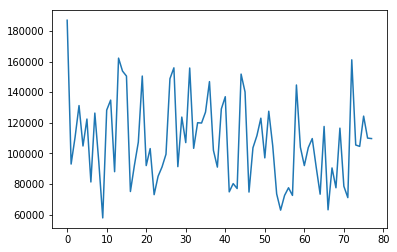

In [40]:
plt.plot(df.salary)
plt.show()

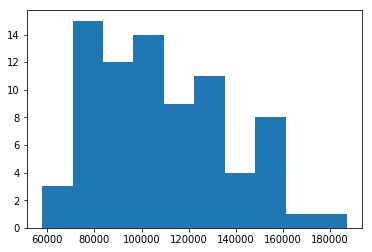

In [42]:
plt.hist(df.salary)
plt.show()